# Video Popularity prediction

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from dateutil import parser
import isodate

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

In [2]:
#NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Model Training libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

## Data Collection

In [4]:
# Loading the CSV file into a pandas DataFrame
video = pd.read_csv("vidio_csv_f.csv")

In [5]:
#view top 10 rows for the DataFrame
video.head(10)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,wl9zCLyBDU4,Krish Naik,What Is a Good Data Science Project For Jobs?,In this video I will be dicussing about key po...,"['yt:cc=on', 'end to end data science project'...",2024-03-05T12:05:00Z,20932,804.0,NaN,37.0,PT13M41S,hd,False
1,yPphKQp1fqE,Krish Naik,Ollama-Run large language models Locally-Run L...,"Get up and running with large language models,...","['yt:cc=on', 'ollama tutorials', 'run llm mode...",2024-03-03T11:25:58Z,17096,300.0,NaN,36.0,PT20M58S,hd,False
2,wN07Wwtp6LE,Krish Naik,The Era of 1-bit LLMs-All Large Language Model...,"In this work,a 1-bit LLM variant,namely BitNet...","['yt:cc=on', '1 bit llm models', 'llm models i...",2024-02-29T10:03:01Z,28781,518.0,NaN,54.0,PT17M6S,hd,False
3,l5a_uKnbEr4,Krish Naik,"Part 2-LoRA,QLoRA Indepth Mathematical Intuiti...",In this video we will be dicussing about amazi...,"['yt:cc=on', 'Lora finetuning', 'QLoRA finetun...",2024-02-27T10:48:47Z,9862,229.0,NaN,14.0,PT22M44S,hd,False
4,UCqyn1v3q4M,Krish Naik,Data Science Projects For Resume,github: https://github.com/krishnaik06/Data-Sc...,"['yt:cc=on', 'data science projects', 'ml proj...",2024-02-26T14:42:06Z,22594,1059.0,NaN,54.0,PT8M45S,hd,False
5,UWo9r6flDjk,Krish Naik,Meet Gemma: Google's New Open-source AI Model-...,Gemma is built for responsible AI development ...,"['yt:cc=on', 'google open source models', 'goo...",2024-02-23T11:31:13Z,21728,536.0,NaN,61.0,PT22M27S,hd,False
6,nQV5_Eb-mhk,Krish Naik,Must Frameworks To Learn In Generative AI #lan...,In this video we will discuss about important ...,"['yt:cc=on', 'aws bedrock tutorials', 'llamind...",2024-02-20T15:58:26Z,26289,581.0,NaN,41.0,PT17M42S,hd,False
7,4ijnajzwor8,Krish Naik,Simplify LLMOps & Build LLM Pipeline in Minutes,Simplify LLMOps & Build LLM Pipeline in Minute...,"['yt:cc=on', 'llmops tutorials', 'build llm pi...",2024-02-17T06:26:51Z,16411,283.0,NaN,26.0,PT22M13S,hd,False
8,6S59Y0ckTm4,Krish Naik,Part 1-Road To Learn Finetuning LLM With Custo...,Quantization is a common technique used to red...,"['yt:cc=on', 'lora finetuning tutorials', 'QLo...",2024-02-15T11:04:30Z,14920,340.0,NaN,33.0,PT32M55S,hd,False
9,fyQTv_PRwgU,Krish Naik,How AI Can Help You Improve Logic Building In ...,In thsi video we will dicuss about how AI can ...,"['yt:cc=on', 'improve logic building', 'progra...",2024-02-14T13:47:49Z,8558,335.0,NaN,24.0,PT7M2S,hd,False


In [6]:
# Display the shape of the DataFrame (number of rows and columns)
video.shape

(4933, 13)

In [7]:
# Display summary statistics of numerical columns in the DataFrame
video.describe()

,viewCount,likeCount,favouriteCount,commentCount
count,4.933000e+03,4932.000000,0.0,4931.000000
mean,9.227934e+04,2053.918897,NaN,119.180694
std,2.315386e+05,6143.166154,NaN,245.131034
min,0.000000e+00,0.000000,NaN,0.000000
25%,8.321000e+03,190.750000,NaN,16.000000
50%,2.437100e+04,540.000000,NaN,47.000000
75%,7.972000e+04,1587.250000,NaN,114.000000
max,4.302462e+06,184989.000000,NaN,4354.000000


## Data Cleaning

In [8]:
# Check for missing values in each column of the DataFrame
video.isnull().any()

video_id          False
channelTitle      False
title             False
description        True
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [9]:
video.isnull().sum()

video_id             0
channelTitle         0
title                0
description         42
tags               463
publishedAt          0
viewCount            0
likeCount            1
favouriteCount    4933
commentCount         2
duration             0
definition           0
caption              0
dtype: int64

#### Handling missing values

In [10]:
#Drop the column favouriteCount as it contains no value
video.drop(columns = ['favouriteCount'],inplace = True)

In [11]:
#Get the count of null value for column description
video['description'].isnull().sum()

42

In [12]:
#As the column description has very few null value we can just drop these column 
video.dropna(subset=['description'],inplace = True)

In [13]:
video['description'].isnull().sum()

0

Similarly now we check for other column having null values

In [14]:
# checking count of null value for likeCount Column
print(video['likeCount'].isnull().sum())

# checking count of null value for commentCount Column
print(video['commentCount'].isnull().sum())

# checking count of null value for tags Column
print( video['tags'].isnull().sum())

1
1
436


- As the null Count for the columns likeCount and commentCount are very less we will just drop these rows.

In [15]:
#Dropping columns with null value
video.dropna(subset=['likeCount'],inplace = True)
video.dropna(subset=['commentCount'],inplace = True)

In [16]:
# checking the results
video.isnull().sum()

video_id          0
channelTitle      0
title             0
description       0
tags            435
publishedAt       0
viewCount         0
likeCount         0
commentCount      0
duration          0
definition        0
caption           0
dtype: int64

In [17]:
# Display information (Count, datatype, notNull) about the DataFrame
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4889 entries, 0 to 4932
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      4889 non-null   object 
 1   channelTitle  4889 non-null   object 
 2   title         4889 non-null   object 
 3   description   4889 non-null   object 
 4   tags          4454 non-null   object 
 5   publishedAt   4889 non-null   object 
 6   viewCount     4889 non-null   int64  
 7   likeCount     4889 non-null   float64
 8   commentCount  4889 non-null   float64
 9   duration      4889 non-null   object 
 10  definition    4889 non-null   object 
 11  caption       4889 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 463.1+ KB


- we can observe that some of the numeric columns are not having numeric datatype, so we will change them to integer or float value

## Data Transformation

In [18]:
#converting to numeric datatype
cols = ['viewCount', 'likeCount', 'commentCount']
video[cols] = video[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [19]:
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4889 entries, 0 to 4932
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      4889 non-null   object 
 1   channelTitle  4889 non-null   object 
 2   title         4889 non-null   object 
 3   description   4889 non-null   object 
 4   tags          4454 non-null   object 
 5   publishedAt   4889 non-null   object 
 6   viewCount     4889 non-null   float64
 7   likeCount     4889 non-null   float64
 8   commentCount  4889 non-null   float64
 9   duration      4889 non-null   object 
 10  definition    4889 non-null   object 
 11  caption       4889 non-null   bool   
dtypes: bool(1), float64(3), object(8)
memory usage: 463.1+ KB


#### Mapping

In [20]:
# Mapping the definition column where:  'hd' corresponds to 1 and 'sd' corresponds to 0.
mapping = {'hd': 1, 'sd': 0}
video['definition'] = video['definition'].replace(mapping)

In [21]:
# Mapping boolean value to numeric
video['caption'] = video['caption'].astype(int)

## Feature Engineering

In [22]:
#Extracting date and time from the column publishedAt

import datetime
# Function to split date and time
def split_date_time(publishedAt):
    published_datetime = datetime.datetime.strptime(publishedAt, "%Y-%m-%dT%H:%M:%SZ")
    published_date = published_datetime.date()
    published_time = published_datetime.time()
    return published_date, published_time

# Apply the function to the 'published_time' column
video[['published_date', 'published_time']] = video['publishedAt'].apply(lambda a: pd.Series(split_date_time(a)))

- As published_date is of no use for data_modelling we will extract the day_name from published_date and furtur convert it to numerical value.

In [23]:
# Function to extract hour
def extract_hour(time_obj):
    return time_obj.hour

# Apply the function to the 'published_time' column
video['published_hour'] = video['published_time'].apply(extract_hour)

In [24]:
video['published_hour']

0       12
1       11
2       10
3       10
4       14
        ..
4928    14
4929    21
4930    14
4931    16
4932    21
Name: published_hour, Length: 4889, dtype: int64

In [25]:
# Function to extract the day of the week
def extract_day_of_week(date_string):
    # Convert the date string to a datetime object
    date_object = datetime.datetime.strptime(str(date_string), '%Y-%m-%d')
    day_of_week = date_object.weekday()
    day_name = date_object.strftime('%A')
    return day_of_week, day_name

# Apply the function to the 'published_date' column
video[['day_of_week_numeric', 'day_of_week_name']] = video['published_date'].apply(lambda x: pd.Series(extract_day_of_week(x)))

In [26]:
#creating a function to change duration into seconds

def duration_to_seconds(duration_str):
    # Remove 'PT' from the beginning
    duration_str = duration_str[2:]
    
    # Initialize total seconds
    total_seconds = 0
    
    # Check if 'H' (hours) is present
    if 'H' in duration_str:
        hours, duration_str = duration_str.split('H')
        total_seconds += int(hours) * 3600
    
    # Check if 'M' (minutes) is present
    if 'M' in duration_str:
        minutes, duration_str = duration_str.split('M')
        total_seconds += int(minutes) * 60
    
    # Check if 'S' (seconds) is present
    if 'S' in duration_str:
        seconds = duration_str.replace('S', '')
        total_seconds += int(seconds)
    
    return total_seconds

# Apply the function to convert duration column to seconds
video['duration_seconds'] = video['duration'].apply(duration_to_seconds)

In [27]:
# Add a column demonstrating number of tags
video['tagsCount'] = video['tags'].apply(lambda x: 0 if isinstance(x, float) and np.isnan(x) else len(x))

In [28]:
# Comments and likes per 1000 view ratio
video['likeRatio'] = video['likeCount']/ video['viewCount'] * 1000
video['commentRatio'] = video['commentCount']/ video['viewCount'] * 1000

In [29]:
# Find titleLength
video['titleLength'] = video['title'].apply(lambda x: len(x))

In [30]:
video.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,...,published_date,published_time,published_hour,day_of_week_numeric,day_of_week_name,duration_seconds,tagsCount,likeRatio,commentRatio,titleLength
0,wl9zCLyBDU4,Krish Naik,What Is a Good Data Science Project For Jobs?,In this video I will be dicussing about key po...,"['yt:cc=on', 'end to end data science project'...",2024-03-05T12:05:00Z,20932.0,804.0,37.0,PT13M41S,...,2024-03-05,12:05:00,12,1,Tuesday,821,139,38.410090,1.767629,45
1,yPphKQp1fqE,Krish Naik,Ollama-Run large language models Locally-Run L...,"Get up and running with large language models,...","['yt:cc=on', 'ollama tutorials', 'run llm mode...",2024-03-03T11:25:58Z,17096.0,300.0,36.0,PT20M58S,...,2024-03-03,11:25:58,11,6,Sunday,1258,173,17.547964,2.105756,82
2,wN07Wwtp6LE,Krish Naik,The Era of 1-bit LLMs-All Large Language Model...,"In this work,a 1-bit LLM variant,namely BitNet...","['yt:cc=on', '1 bit llm models', 'llm models i...",2024-02-29T10:03:01Z,28781.0,518.0,54.0,PT17M6S,...,2024-02-29,10:03:01,10,3,Thursday,1026,186,17.997985,1.876238,64
3,l5a_uKnbEr4,Krish Naik,"Part 2-LoRA,QLoRA Indepth Mathematical Intuiti...",In this video we will be dicussing about amazi...,"['yt:cc=on', 'Lora finetuning', 'QLoRA finetun...",2024-02-27T10:48:47Z,9862.0,229.0,14.0,PT22M44S,...,2024-02-27,10:48:47,10,1,Tuesday,1364,199,23.220442,1.419590,71
4,UCqyn1v3q4M,Krish Naik,Data Science Projects For Resume,github: https://github.com/krishnaik06/Data-Sc...,"['yt:cc=on', 'data science projects', 'ml proj...",2024-02-26T14:42:06Z,22594.0,1059.0,54.0,PT8M45S,...,2024-02-26,14:42:06,14,0,Monday,525,92,46.870851,2.390015,32


## Understanding Data

In [31]:
video.publishedAt.sort_values().value_counts()

2013-06-28T02:54:45Z    11
2014-07-30T02:52:13Z    10
2019-07-03T05:15:02Z     6
2016-05-03T23:06:55Z     5
2013-06-28T02:54:44Z     5
                        ..
2019-02-06T14:57:13Z     1
2019-02-05T16:15:01Z     1
2019-02-05T13:21:06Z     1
2019-02-04T23:40:34Z     1
2024-03-07T06:15:27Z     1
Name: publishedAt, Length: 4831, dtype: int64

- Time line for video lies between 2013 to 2024

Now we take a quick overview of the data's distribution, central tendency, and dispersion and also generate desciptive statistics.

In [32]:
video.describe()

,viewCount,likeCount,commentCount,definition,caption,published_hour,day_of_week_numeric,duration_seconds,tagsCount,likeRatio,commentRatio,titleLength
count,4.889000e+03,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4880.000000,4878.000000,4889.000000
mean,9.295448e+04,2064.032727,119.949683,0.988341,0.115975,12.618736,2.714666,1144.741665,210.004704,inf,2.466106,61.175905
std,2.324635e+05,6168.772843,246.028824,0.107356,0.320227,5.464274,1.942239,1710.209624,145.731011,NaN,3.441569,19.516217
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,8.347000e+03,189.000000,17.000000,1.000000,0.000000,10.000000,1.000000,398.000000,94.000000,12.723315,0.798826,47.000000
50%,2.475100e+04,538.000000,47.000000,1.000000,0.000000,14.000000,3.000000,678.000000,184.000000,22.531819,1.484835,61.000000
75%,8.087900e+04,1590.000000,115.000000,1.000000,0.000000,16.000000,4.000000,1171.000000,317.000000,33.941794,2.804369,76.000000
max,4.302462e+06,184989.000000,4354.000000,1.000000,1.000000,23.000000,6.000000,42896.000000,565.000000,inf,64.910026,105.000000


- The above describe function doesnot gives any clear inference thus 
we generate these descriptive statistics by grouping the dataframe by channel title

In [33]:
# Group by 'channel id' and calculate the mean of 'likeCount' columns
average_likecount_by_channel = video.groupby('channelTitle')['likeCount'].mean()

average_viewcount_by_channel = video.groupby('channelTitle')['viewCount'].mean()

In [34]:
average_likecount_by_channel.astype(int)

channelTitle
Alex The Analyst               2977
Corey Schafer                  8616
Data Science Dojo               173
Ken Jee                        1132
Krish Naik                     1250
Luke Barousse                  4597
StatQuest with Josh Starmer    4967
Tina Huang                     6668
sentdex                        1076
Name: likeCount, dtype: int32


- the above table shows avg like a given channel has achieved.

In [35]:
average_viewcount_by_channel.astype(int)

channelTitle
Alex The Analyst               113736
Corey Schafer                  400599
Data Science Dojo               11916
Ken Jee                         31004
Krish Naik                      52491
Luke Barousse                  134909
StatQuest with Josh Starmer    226707
Tina Huang                     148001
sentdex                         90769
Name: viewCount, dtype: int32

- the above table shows avg view a given channel has achieved.

## Exploratory Data Analysis

<AxesSubplot:>

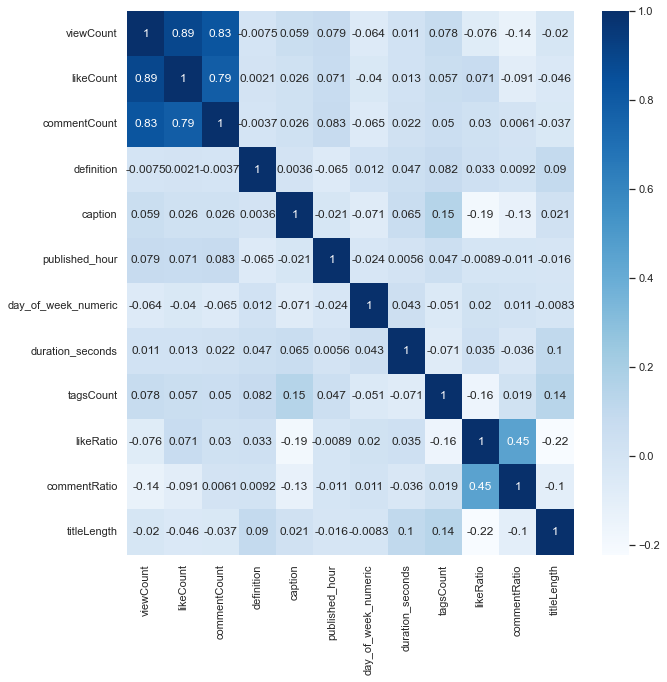

In [36]:
# Find correlation between the features
corr = video.corr() 

# Plotting the heatmap
sns.set(rc={'figure.figsize': (10,10)}) 
sns.heatmap(corr, annot=True, cmap='Blues')


 - likeCount, viewCount and commentCount are highly dependent on each other as they have maximum correlation
 - the least correlation is shown for title length and  like ratio

### View Distribution per Channel

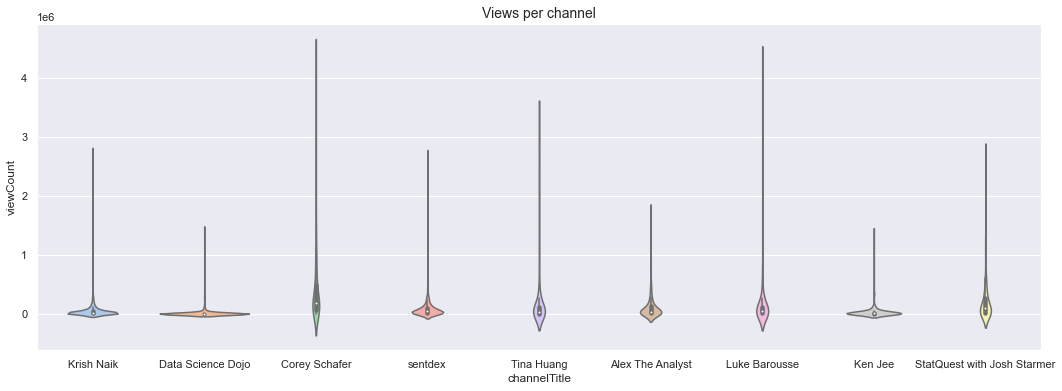

In [37]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(video['channelTitle'], video['viewCount'], palette = 'pastel')
plt.title('Views per channel', fontsize = 14)
plt.show()

- It can be observed that Corey Schafer, sentdex and Luke Barousse have quite large variance in their views, suggesting that they have a few viral videos. Alex The Analyst, Krish Naik and Data Science Dojo have less views overall but the views are more consistent across videos.

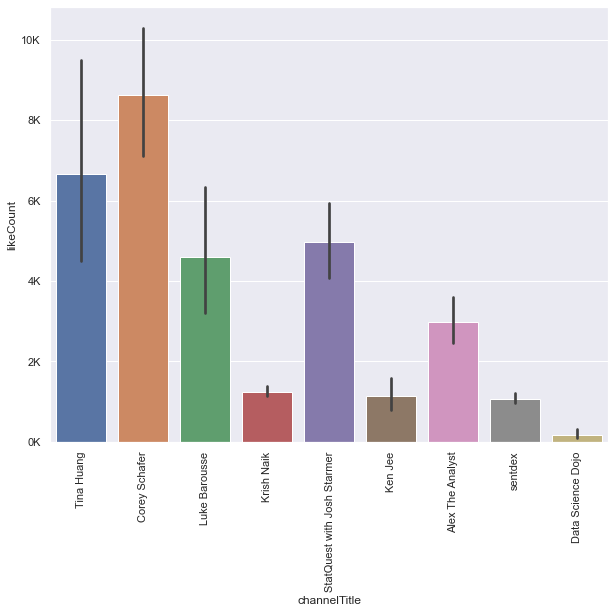

In [38]:
#Visualizing like count against Channeltitle
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='channelTitle', y='likeCount', data=video.sort_values('likeCount', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


 - The channel named Corey Schafer has maximum likes and Data Science Dojo has least

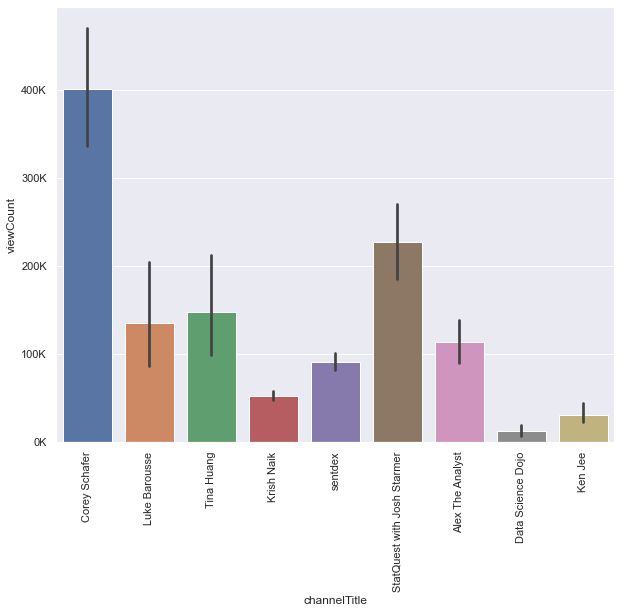

In [39]:
#Visualizing view count against Channeltitle

ax = sns.barplot(x='channelTitle', y='viewCount', data=video.sort_values('viewCount', ascending=False))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

  - The channel Corey Schafer has achieved most views and Data Science Dojo the least.

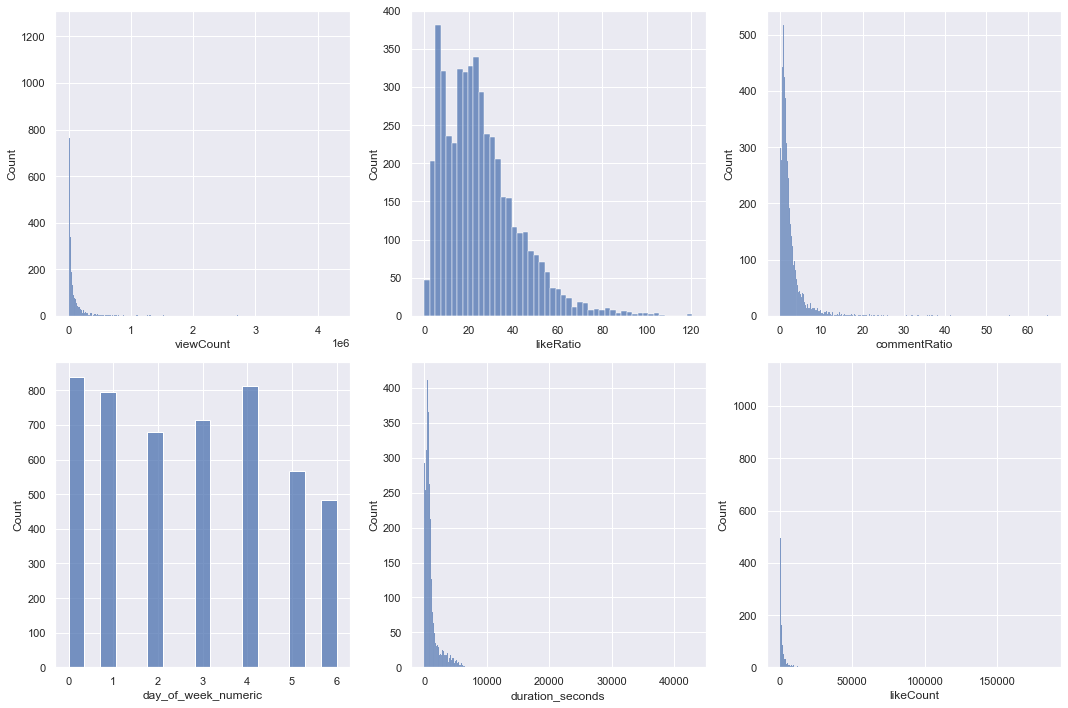

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = 3
rows = 2

num_cols = ['viewCount', 'likeRatio', 'commentRatio', 'day_of_week_numeric', 'duration_seconds', 'likeCount']
fig = plt.figure(figsize=(cols*5, rows*5))

# Create a new figure with a specified size
for i, col in enumerate(num_cols):
    # Calculate the position of each subplot using row and column indices
    row_index = i // cols  # Integer division to get the row index
    col_index = i % cols   # Modulo operation to get the column index

    ax = fig.add_subplot(rows, cols, i+1)
    sns.histplot(x=video[col], ax=ax)

fig.tight_layout()
plt.show()


<AxesSubplot:xlabel='commentCount', ylabel='likeCount'>

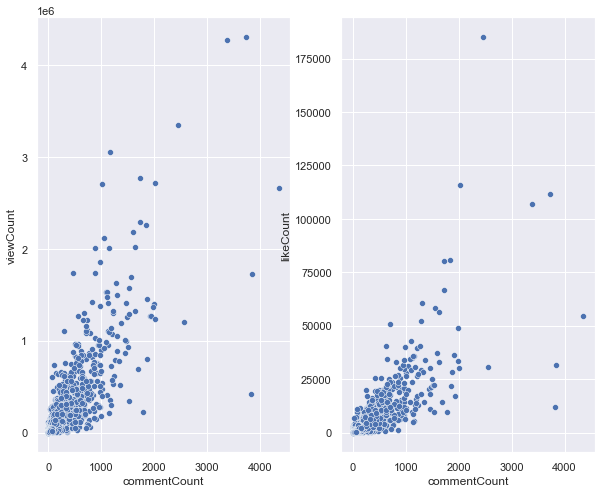

In [41]:
#Visualizing viewCount with likeCount and viewCount with commentCount
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video, x = "commentCount", y = "viewCount", ax=ax[0])

sns.scatterplot(data = video, x = "commentCount", y = "likeCount", ax=ax[1])

 - the above graph shows a direct dependency between view count and comment count and view count and like count

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

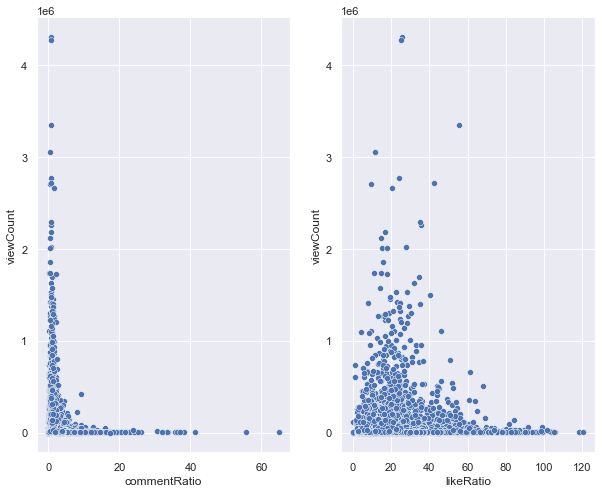

In [42]:
#Visualizing viewCount with likeRatio and viewCount with commentRatio
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video, x = "likeRatio", y = "viewCount", ax=ax[1])

 - when we plot viewCount against comment ratio and like ratio respectively we do not encounter any direct relationship

<AxesSubplot:xlabel='duration_seconds', ylabel='Count'>

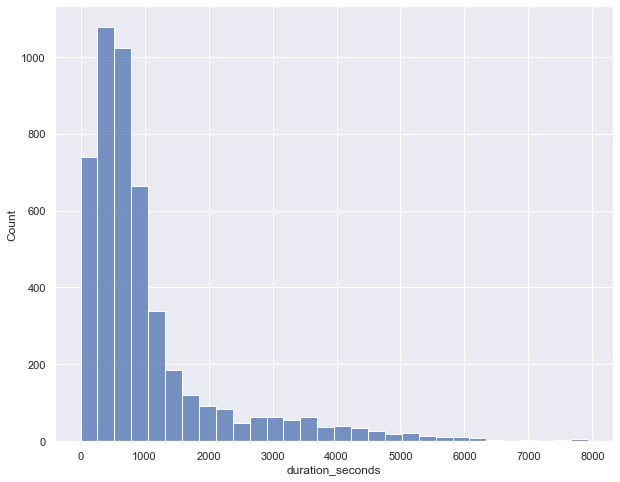

In [43]:
#Plot a histogram for column duration_seconds including values less than 8000
sns.histplot(data=video[video['duration_seconds'] < 8000], x="duration_seconds", bins=30)

- The above histogram shows that most of the video has duration between 300 to 1000, which is about 5 minutes to 17 minutes
- Now we check for dependency of duration with like, view and comment

<AxesSubplot:xlabel='duration_seconds', ylabel='viewCount'>

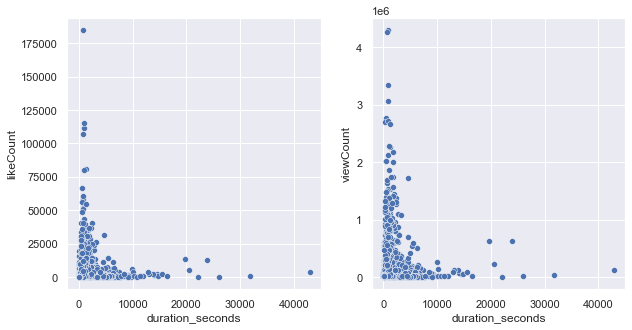

In [44]:
#Visualizinh duration of video with likeCount and comment count
fig, ax =plt.subplots(1,2,figsize = (10,5))
sns.scatterplot(data = video, x = "duration_seconds", y = "likeCount", ax=ax[0])
sns.scatterplot(data = video, x = "duration_seconds", y = "viewCount", ax=ax[1])
#sns.scatterplot(data = video, x = "duration_seconds", y = "commentCount", ax=ax[2])

   - Duration of the video do not correspont to getting like, comment and view for the video

<AxesSubplot:xlabel='titleLength', ylabel='viewCount'>

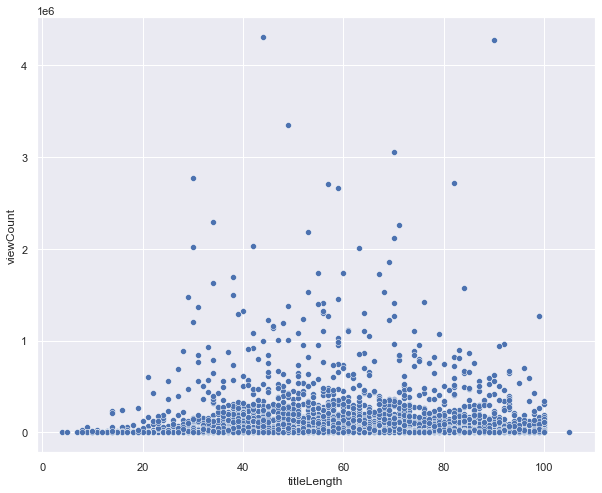

In [45]:
#Visualizing title length with view Count
sns.scatterplot(data = video, x = "titleLength", y = "viewCount")

- we infer that views doesnot depend upon length title of the video.

<AxesSubplot:xlabel='tagsCount', ylabel='viewCount'>

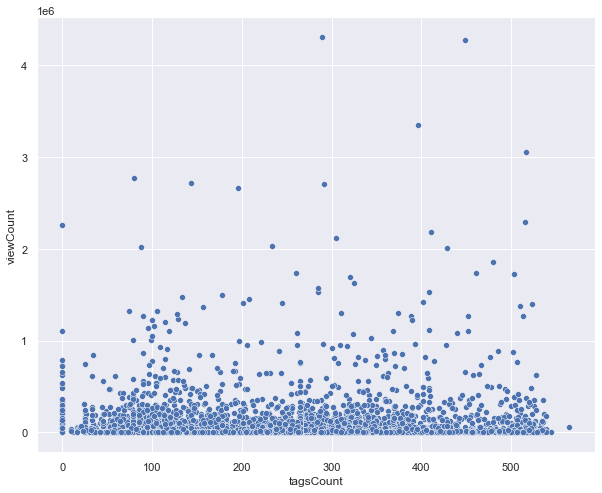

In [46]:
#Visualizing tagsCount with view Count
sns.scatterplot(data = video, x = "tagsCount", y = "viewCount")

- Number of tags in a specific video do not contribute for achieving views
- The relationship between number of tags and view count is not clearly seen

<AxesSubplot:xlabel='definition', ylabel='count'>

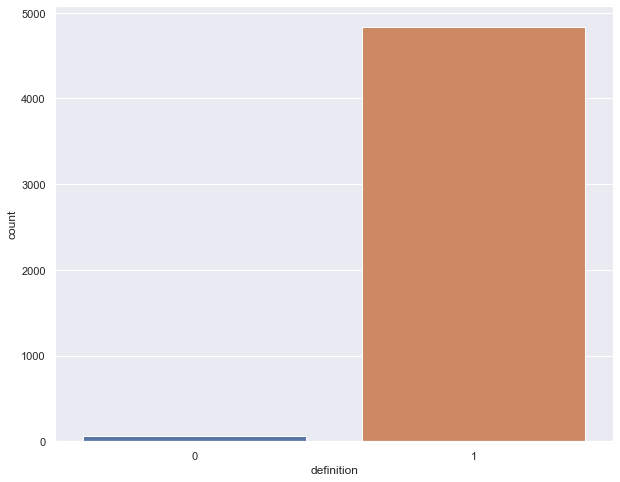

In [47]:
sns.countplot(x='definition',data = video,)#hue=''

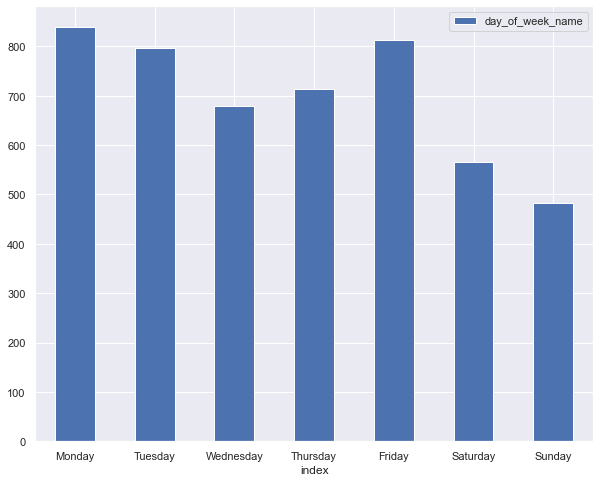

In [48]:
# visualizating frequency of video publishing on each day of the week.
day_df = pd.DataFrame(video['day_of_week_name'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='day_of_week_name', rot=0)

- most number of videos were uploaded on Monday Tuesday and friday.
- fewer were uploaded on Sunday

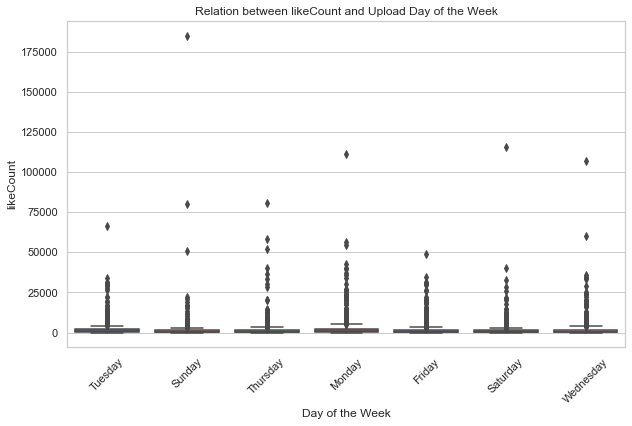

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week_name', y='likeCount', data=video_df)
plt.title('Relation between likeCount and Upload Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('likeCount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

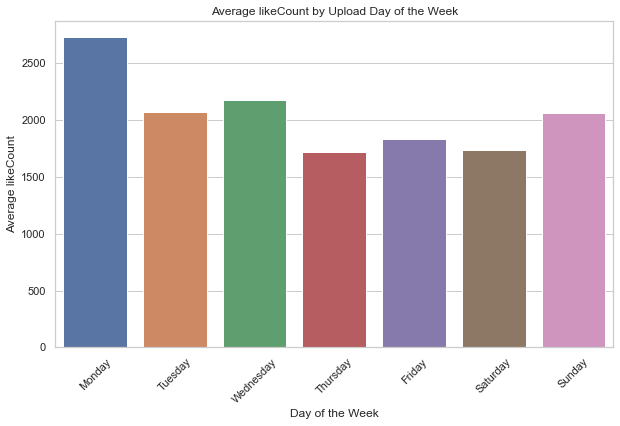

In [105]:
# Group the data by 'day_of_the_week_name' and calculate the mean of 'likeCount'
mean_likecount_by_day = video_df.groupby('day_of_week_name')['likeCount'].mean().reset_index()

# Set the order of days of the week for better visualization
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week_name', y='likeCount', data=mean_likecount_by_day, order=order)
plt.title('Average likeCount by Upload Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average likeCount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


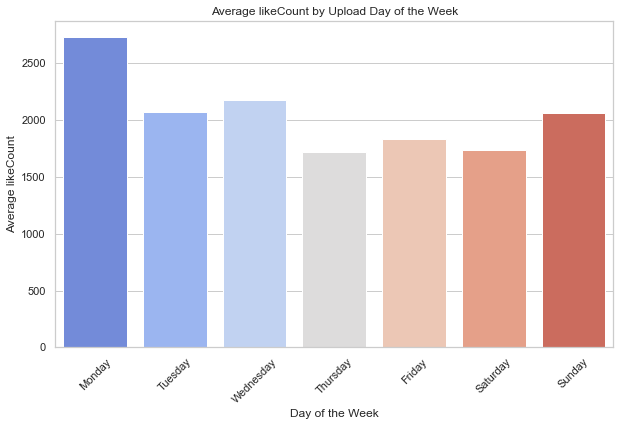

In [106]:
# Define custom colors
custom_palette = sns.color_palette("coolwarm", 7)  # You can choose any color palette you like

# Plotting the graph with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week_name', y='likeCount', data=mean_likecount_by_day, order=order, palette=custom_palette)
plt.title('Average likeCount by Upload Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average likeCount')
plt.xticks(rotation=45)
plt.show()


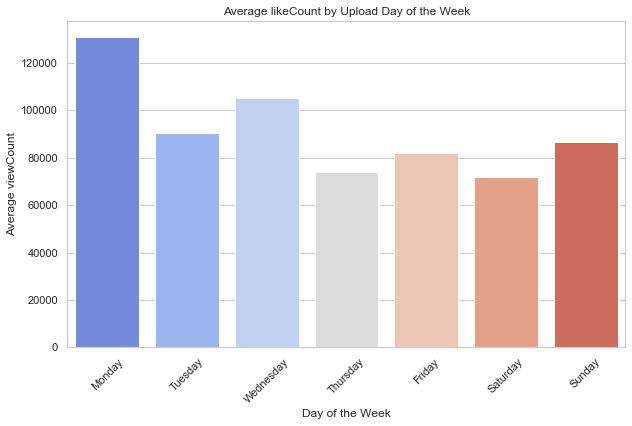

In [107]:
# Group the data by 'day_of_the_week_name' and calculate the mean of 'likeCount'
mean_view_Count_by_day = video_df.groupby('day_of_week_name')['viewCount'].mean().reset_index()

# Set the order of days of the week for better visualization
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Define custom colors
custom_palette = sns.color_palette("coolwarm", 7)  # You can choose any color palette you like

# Plotting the graph with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week_name', y='viewCount', data=mean_view_Count_by_day, order=order, palette=custom_palette)
plt.title('Average likeCount by Upload Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average viewCount')
plt.xticks(rotation=45)
plt.show()

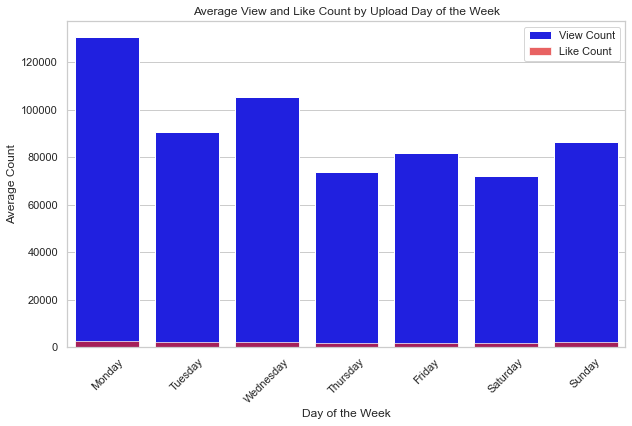

In [53]:
# Calculate the mean view count and like count by upload day of the week
mean_count_by_day = video.groupby('day_of_week_name').agg({'viewCount': 'mean', 'likeCount': 'mean'}).reset_index()

# Define the order of days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the graph
plt.figure(figsize=(10, 6))

# Plotting view count
sns.barplot(x='day_of_week_name', y='viewCount', data=mean_count_by_day, order=order, color='blue', label='View Count')

# Plotting like count
sns.barplot(x='day_of_week_name', y='likeCount', data=mean_count_by_day, order=order, color='red', alpha=0.7, label='Like Count')

plt.title('Average View and Like Count by Upload Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Natural Language Processing

- Lets ponder upon what creators are making videos upon and find most commonly used words in Data Science
- Creating wordcloud for most common words

In [54]:
#using NLP for analyzing column title

stop_words = set(stopwords.words('english')) #remove stopwords for better understanding 
video['title_no_stopwords'] = video['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

In [55]:
all_words_str

'What Is Good Data Science Project For Jobs? Ollama-Run large language models Locally-Run Llama 2, Code Llama, models The Era 1-bit LLMs-All Large Language Models 1.58 Bits Part 2-LoRA,QLoRA Indepth Mathematical Intuition- Finetuning LLM Models Data Science Projects For Resume Meet Gemma: Google\'s New Open-source AI Model- Step By Step FineTuning With Google Gemma With LoRA Must Frameworks To Learn In Generative AI #langchain #llamaindex #chainlit #awsbedrock Simplify LLMOps & Build LLM Pipeline Minutes Part 1-Road To Learn Finetuning LLM With Custom Data-Quantization,LoRA,QLoRA Indepth Intuition How AI Can Help You Improve Logic Building In Programming How Generative AI Will Change All Of Our Jobs In 2024 Steps By Step Tutorial To Fine Tune LLAMA 2 With Custom Dataset Using LoRA And QLoRA Techniques How Meta Is Changing future Generative AI 80-20% Rule Of Learning Data Science Efficiently How Learn Financial Analysis Python 10x Faster Self Motivation vs Derived Motivation Resume Disc

### Wordcloud for words in column title

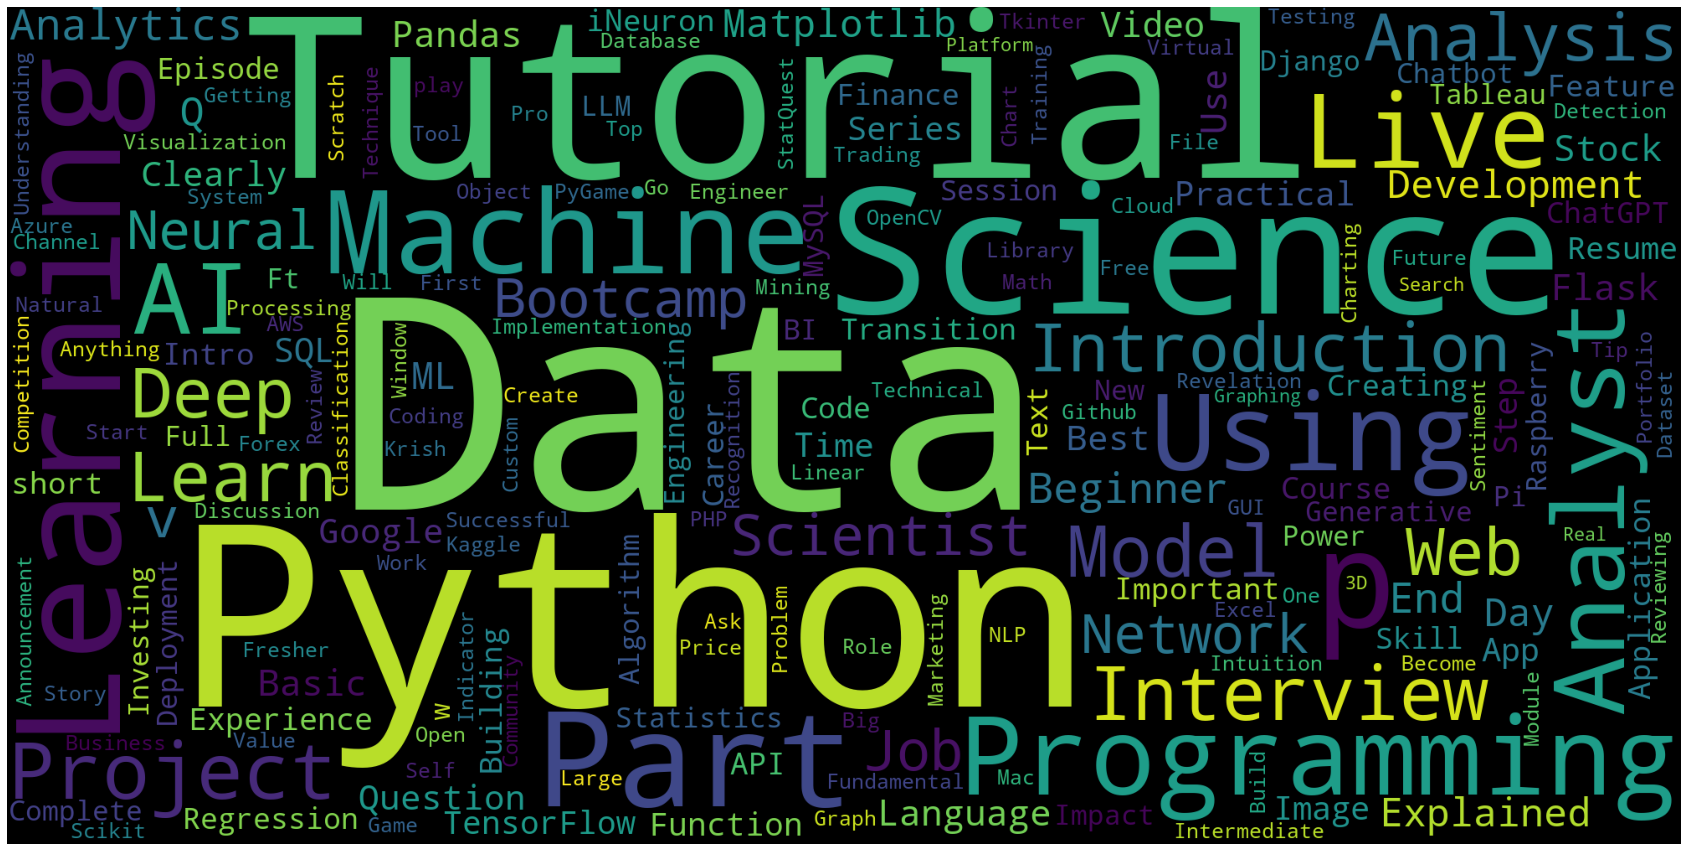

In [56]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

- It can be seen that most common words are Data, Python, Tutorial, Science, Projects, Analysis, Programming, Learning, which is very expected.

### Loading and analyzing comments

In [57]:
comments_df = pd.read_csv("comments_data_top10_channels.csv")

In [58]:
comments_df.head(5)

,Unnamed: 0,video_id,comments
0,0,RtuzJuaesmo,['I guess we just show products without sourci...
1,1,cGTej4dwUPg,['What did you do in your background in pharma...
2,2,mTCAiAr9mPg,"[""Start practicing prompt engineering with Hub..."
3,3,zttZ8cFbY_g,"[""Head to http://brilliant.org/TinaHuang/ to g..."
4,4,Kbzr7p2cIbk,['Can someone give summary of this? Related to...


In [59]:
#removing stopwords
stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

### WordCloud for comment

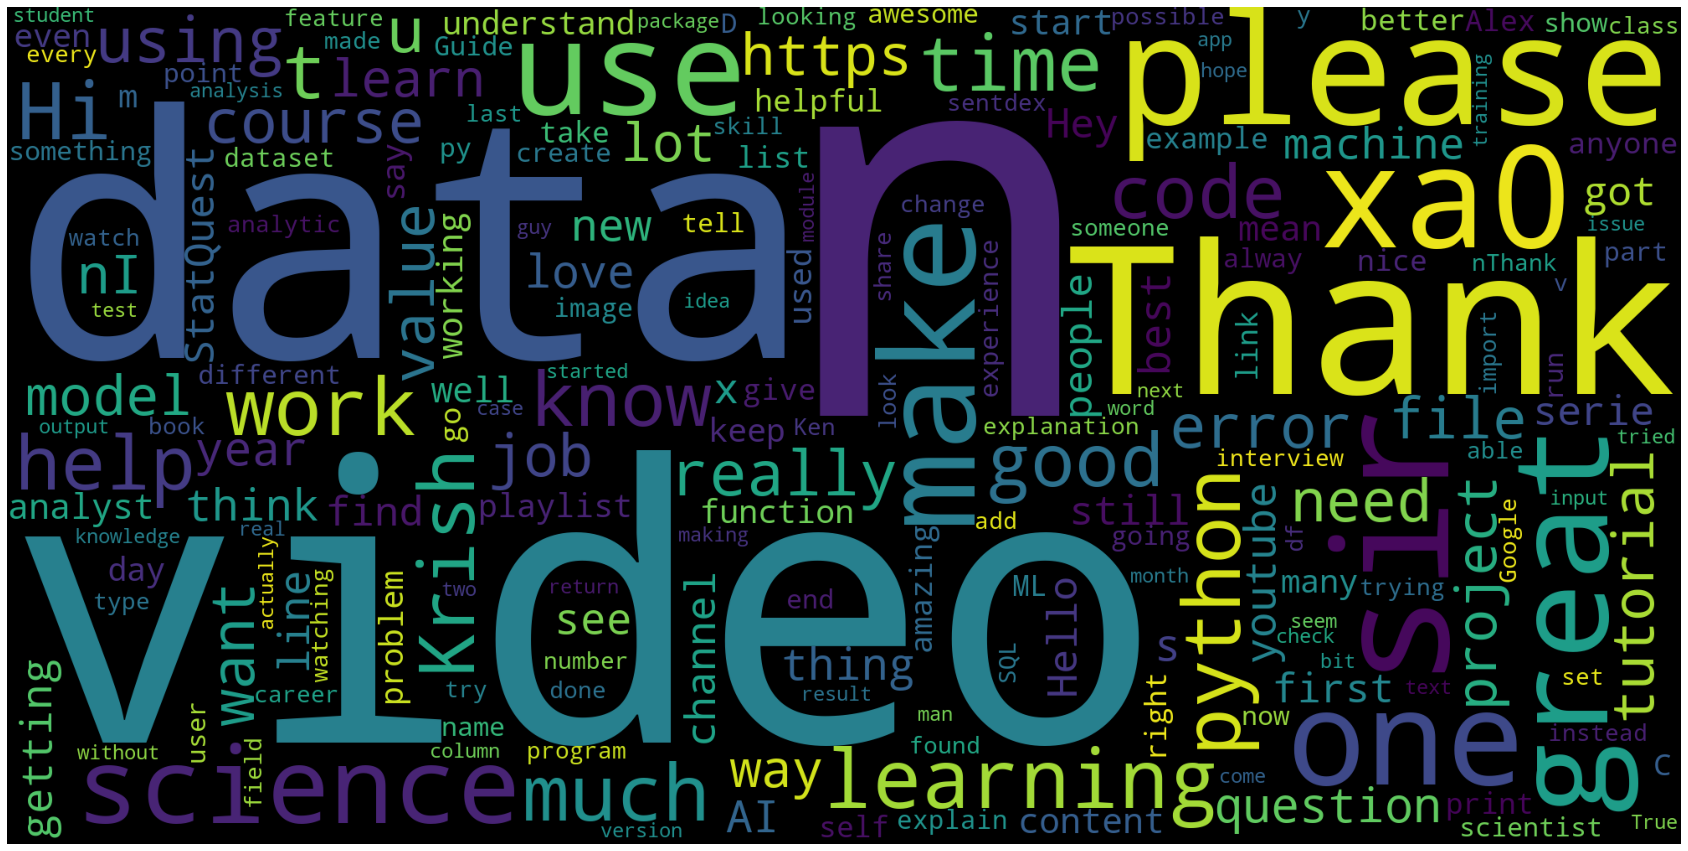

In [60]:
#creating wordCloud
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

- We can see that next to the obvious words such as "video", "data", the most frequent words are quite positive, such as "thank", "great", "good", "awesome", "love". A lot of comments also request something with the word "please".


In [61]:
video.head(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,...,published_time,published_hour,day_of_week_numeric,day_of_week_name,duration_seconds,tagsCount,likeRatio,commentRatio,titleLength,title_no_stopwords
0,wl9zCLyBDU4,Krish Naik,What Is a Good Data Science Project For Jobs?,In this video I will be dicussing about key po...,"['yt:cc=on', 'end to end data science project'...",2024-03-05T12:05:00Z,20932.0,804.0,37.0,PT13M41S,...,12:05:00,12,1,Tuesday,821,139,38.410090,1.767629,45,"[What, Is, Good, Data, Science, Project, For, ..."
1,yPphKQp1fqE,Krish Naik,Ollama-Run large language models Locally-Run L...,"Get up and running with large language models,...","['yt:cc=on', 'ollama tutorials', 'run llm mode...",2024-03-03T11:25:58Z,17096.0,300.0,36.0,PT20M58S,...,11:25:58,11,6,Sunday,1258,173,17.547964,2.105756,82,"[Ollama-Run, large, language, models, Locally-..."
2,wN07Wwtp6LE,Krish Naik,The Era of 1-bit LLMs-All Large Language Model...,"In this work,a 1-bit LLM variant,namely BitNet...","['yt:cc=on', '1 bit llm models', 'llm models i...",2024-02-29T10:03:01Z,28781.0,518.0,54.0,PT17M6S,...,10:03:01,10,3,Thursday,1026,186,17.997985,1.876238,64,"[The, Era, 1-bit, LLMs-All, Large, Language, M..."
3,l5a_uKnbEr4,Krish Naik,"Part 2-LoRA,QLoRA Indepth Mathematical Intuiti...",In this video we will be dicussing about amazi...,"['yt:cc=on', 'Lora finetuning', 'QLoRA finetun...",2024-02-27T10:48:47Z,9862.0,229.0,14.0,PT22M44S,...,10:48:47,10,1,Tuesday,1364,199,23.220442,1.419590,71,"[Part, 2-LoRA,QLoRA, Indepth, Mathematical, In..."
4,UCqyn1v3q4M,Krish Naik,Data Science Projects For Resume,github: https://github.com/krishnaik06/Data-Sc...,"['yt:cc=on', 'data science projects', 'ml proj...",2024-02-26T14:42:06Z,22594.0,1059.0,54.0,PT8M45S,...,14:42:06,14,0,Monday,525,92,46.870851,2.390015,32,"[Data, Science, Projects, For, Resume]"


In [62]:
comments_df.head(5)

,Unnamed: 0,video_id,comments,comments_no_stopwords
0,0,RtuzJuaesmo,['I guess we just show products without sourci...,"[['I, guess, show, products, without, sourcing..."
1,1,cGTej4dwUPg,['What did you do in your background in pharma...,"[['What, background, pharmacology?, I, getting..."
2,2,mTCAiAr9mPg,"[""Start practicing prompt engineering with Hub...","[[""Start, practicing, prompt, engineering, Hub..."
3,3,zttZ8cFbY_g,"[""Head to http://brilliant.org/TinaHuang/ to g...","[[""Head, http://brilliant.org/TinaHuang/, get,..."
4,4,Kbzr7p2cIbk,['Can someone give summary of this? Related to...,"[['Can, someone, give, summary, this?, Related..."


In [63]:
#drop column named unnamed
comments_df.drop(comments_df.columns[0], axis=1, inplace=True)

In [64]:
video.shape

(4889, 23)

### Merge DataFrames

In [65]:
video_df = pd.merge(video, comments_df, on='video_id', how='inner')

In [66]:
video_df.head(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,...,day_of_week_numeric,day_of_week_name,duration_seconds,tagsCount,likeRatio,commentRatio,titleLength,title_no_stopwords,comments,comments_no_stopwords
0,wl9zCLyBDU4,Krish Naik,What Is a Good Data Science Project For Jobs?,In this video I will be dicussing about key po...,"['yt:cc=on', 'end to end data science project'...",2024-03-05T12:05:00Z,20932.0,804.0,37.0,PT13M41S,...,1,Tuesday,821,139,38.410090,1.767629,45,"[What, Is, Good, Data, Science, Project, For, ...","['If you like the video,please consider subscr...","[['If, like, video,please, consider, subscribi..."
1,yPphKQp1fqE,Krish Naik,Ollama-Run large language models Locally-Run L...,"Get up and running with large language models,...","['yt:cc=on', 'ollama tutorials', 'run llm mode...",2024-03-03T11:25:58Z,17096.0,300.0,36.0,PT20M58S,...,6,Sunday,1258,173,17.547964,2.105756,82,"[Ollama-Run, large, language, models, Locally-...",['llm=ollama(base_url=\'http://localhost:11434...,[['llm=ollama(base_url=\'http://localhost:1143...
2,wN07Wwtp6LE,Krish Naik,The Era of 1-bit LLMs-All Large Language Model...,"In this work,a 1-bit LLM variant,namely BitNet...","['yt:cc=on', '1 bit llm models', 'llm models i...",2024-02-29T10:03:01Z,28781.0,518.0,54.0,PT17M6S,...,3,Thursday,1026,186,17.997985,1.876238,64,"[The, Era, 1-bit, LLMs-All, Large, Language, M...",['Please release a step by step guide on how t...,"[['Please, release, step, step, guide, fine, t..."
3,l5a_uKnbEr4,Krish Naik,"Part 2-LoRA,QLoRA Indepth Mathematical Intuiti...",In this video we will be dicussing about amazi...,"['yt:cc=on', 'Lora finetuning', 'QLoRA finetun...",2024-02-27T10:48:47Z,9862.0,229.0,14.0,PT22M44S,...,1,Tuesday,1364,199,23.220442,1.419590,71,"[Part, 2-LoRA,QLoRA, Indepth, Mathematical, In...",['Wow.....such a quick and clear explaination ...,"[['Wow.....such, quick, clear, explaination, t..."
4,UCqyn1v3q4M,Krish Naik,Data Science Projects For Resume,github: https://github.com/krishnaik06/Data-Sc...,"['yt:cc=on', 'data science projects', 'ml proj...",2024-02-26T14:42:06Z,22594.0,1059.0,54.0,PT8M45S,...,0,Monday,525,92,46.870851,2.390015,32,"[Data, Science, Projects, For, Resume]","['Sir, I have 1 question, can i start this in ...","[['Sir,, I, 1, question,, start, similar, chro..."


In [67]:
video_df.shape

(4877, 25)

In [68]:
# Convert categorical variables to numerical format
le = LabelEncoder()
video_df['title'] = le.fit_transform(video_df['title'])
video_df['tags'] = le.fit_transform(video_df['tags'])
video_df['description'] = le.fit_transform(video_df['description'])

In [69]:
video_df['title']

0       4540
1       2837
2       4006
3       2911
4        912
        ... 
4872    4065
4873    4741
4874    3375
4875    4801
4876     787
Name: title, Length: 4877, dtype: int32

In [70]:
# creating a column for Y which contains a true vale for view and likes greater than 1000
video_df['trending_rows'] = (video_df['viewCount'] > 1000) & (video_df['likeCount'] > 1000)
# mapping true and false value to 0 and 1
video_df['trending_rows'] = video_df['trending_rows'].map({True: 1, False: 0})


## Data Splitting:

In [71]:
#Train Test Split
# Select features for training the model
features = ['title','tags', 'published_hour', 'duration_seconds','day_of_week_numeric']
X = video_df[features]
y = video_df['trending_rows']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building: Random Forest Classifier

In [72]:
#Model Selection
# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model.predict(X_test)

# Evaluate the model
accuracy_random_forest = accuracy_score(y_test, y_pred_rf)
 
print(f'Accuracy: {accuracy_random_forest:.2f}')

# Display classification report
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       627
           1       0.68      0.44      0.53       349

    accuracy                           0.72       976
   macro avg       0.71      0.66      0.67       976
weighted avg       0.72      0.72      0.71       976



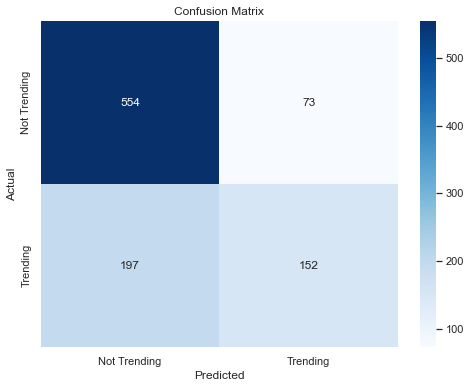

In [73]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Trending', 'Trending'], yticklabels=['Not Trending', 'Trending'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

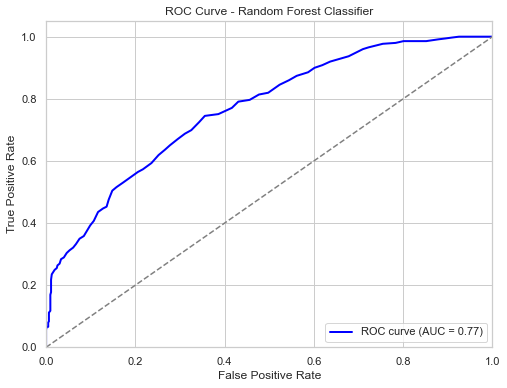

In [74]:
from sklearn.metrics import roc_curve, auc
# Compute predicted probabilities for positive class
y_prob_rf = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

## HyperParameter Tuning for Random Forest

In [75]:
# adding a column comment count and lets see how our model behaves
#Train Test Split
# Select features for training the model
tuned_features = ['title','tags', 'published_hour', 'duration_seconds','day_of_week_numeric','commentCount']
X_tuned_rf = video_df[tuned_features]
y_tuned_rf = video_df['trending_rows']

# Split the data into training and testing sets
X_train_tuned_rf, X_test_tuned_rf, y_train_tuned_rf, y_test_tuned_rf = train_test_split(X_tuned_rf, y_tuned_rf, test_size=0.2, random_state=42)

In [76]:
#Model Selection
# Build a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tuned_rf, y_train_tuned_rf)

# Make predictions on the test set
y_pred_tuned_rf = model.predict(X_test_tuned_rf)

# Evaluate the model
accuracy_tuned_rf = accuracy_score(y_test_tuned_rf, y_pred_tuned_rf)
print(f'Accuracy: {accuracy_tuned_rf:.2f}')

# Display classification report
print(classification_report(y_test_tuned_rf, y_pred_tuned_rf))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       627
           1       0.81      0.79      0.80       349

    accuracy                           0.86       976
   macro avg       0.85      0.84      0.84       976
weighted avg       0.86      0.86      0.86       976



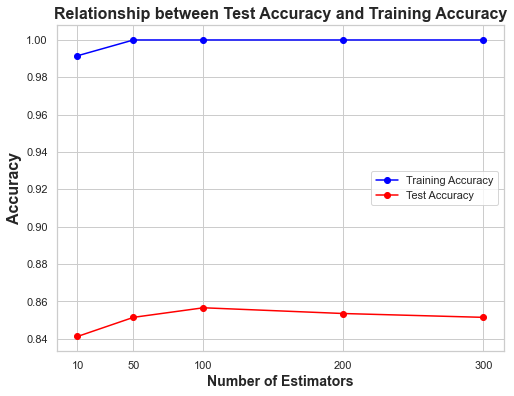

In [77]:
import matplotlib.pyplot as plt

# Define a range of values for number of estimators (trees) in the Random Forest
estimators_range = [10, 50, 100, 200, 300]

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Iterate over the range of estimators
for n_estimators in estimators_range:
    # Build the Random Forest model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the model
    model.fit(X_train_tuned_rf, y_train_tuned_rf)
    
    # Calculate training accuracy and append to list
    train_accuracy = model.score(X_train_tuned_rf, y_train_tuned_rf)
    train_accuracies.append(train_accuracy)
    
    # Calculate test accuracy and append to list
    test_accuracy = model.score(X_test_tuned_rf, y_test_tuned_rf)
    test_accuracies.append(test_accuracy)

# Plot the relationship between training and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(estimators_range, train_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.plot(estimators_range, test_accuracies, marker='o', label='Test Accuracy', color='red')
plt.xlabel('Number of Estimators', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.title('Relationship between Test Accuracy and Training Accuracy', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(estimators_range)
plt.show()


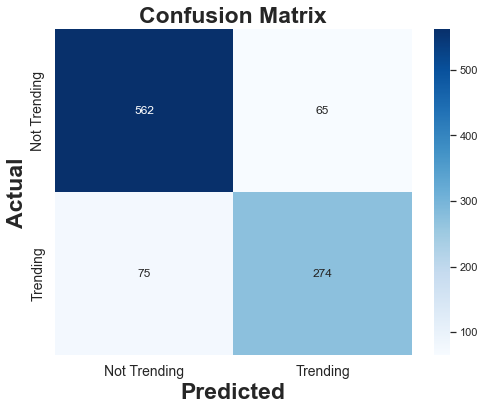

In [78]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_tuned_rf, y_pred_tuned_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Trending', 'Trending'], yticklabels=['Not Trending', 'Trending'])
plt.xlabel('Predicted',fontsize=23, fontweight='bold')
plt.ylabel('Actual',fontsize=23, fontweight='bold')
plt.title('Confusion Matrix',fontsize=23, fontweight='bold')
# Set font properties for x-axis tick labels
plt.xticks(fontsize=14 )  
# Set font properties for y-axis tick labels
plt.yticks(fontsize=14) 
plt.show()

### Inference:
- We have 2 classes in our model namely Not Trending AND Trending.
- From the matrix we can see that 562 elements were correctly classified as Not Trending and 274 were classified as  Trending.
- Other than this 65,75 were wrongly classified.

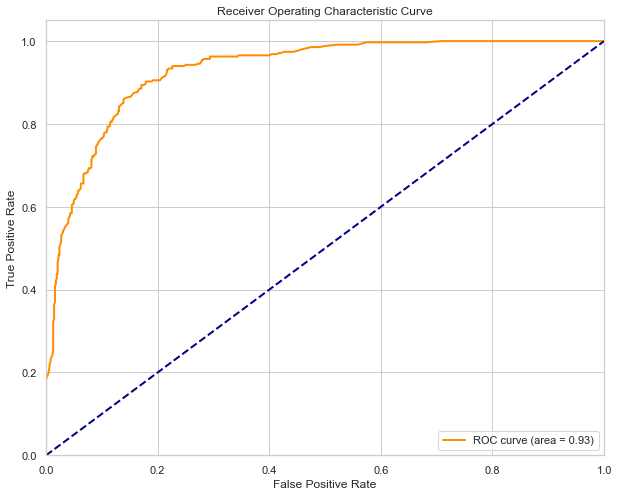

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob_tuned_rf = model.predict_proba(X_test_tuned_rf)[:, 1]

# Compute ROC curve and ROC area
fpr_tuned_rf, tpr_tuned_rf, _ = roc_curve(y_test_tuned_rf, y_prob_tuned_rf)
roc_auc_tuned_rf = auc(fpr_tuned_rf, tpr_tuned_rf)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr_tuned_rf, tpr_tuned_rf, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


### Comparing Random Forest model with tuned Random Forest Model

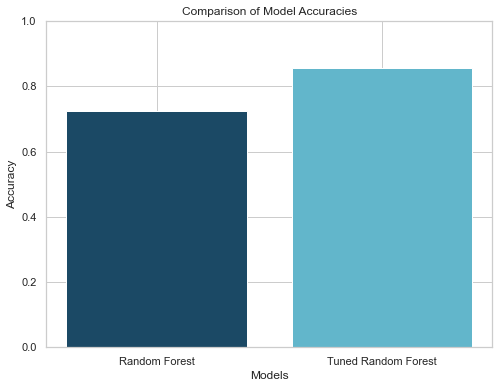

In [82]:
# Now we compare the accuracy of both the model.

# Define model names and their accuracies
model_names = ['Random Forest', 'Tuned Random Forest']
accuracies = [accuracy_random_forest, accuracy_tuned_rf]  # Provide the accuracies of the models

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['#1b4965', '#62b6cb'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.0, 1.0)
plt.show()


### Inference:
- By hyperparameter tuning the model random forest we can conclude that the column comment count plays a significant role in improving the accuracy for the model.
- Thus while building another model we would also consider the attribute comment count.

## Model Building: XgBoost

#### Importing Library

In [83]:
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack


In [84]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,...,day_of_week_name,duration_seconds,tagsCount,likeRatio,commentRatio,titleLength,title_no_stopwords,comments,comments_no_stopwords,trending_rows
0,wl9zCLyBDU4,Krish Naik,4540,1774,3259,2024-03-05T12:05:00Z,20932.0,804.0,37.0,PT13M41S,...,Tuesday,821,139,38.410090,1.767629,45,"[What, Is, Good, Data, Science, Project, For, ...","['If you like the video,please consider subscr...","[['If, like, video,please, consider, subscribi...",0
1,yPphKQp1fqE,Krish Naik,2837,739,3509,2024-03-03T11:25:58Z,17096.0,300.0,36.0,PT20M58S,...,Sunday,1258,173,17.547964,2.105756,82,"[Ollama-Run, large, language, models, Locally-...",['llm=ollama(base_url=\'http://localhost:11434...,[['llm=ollama(base_url=\'http://localhost:1143...,0
2,wN07Wwtp6LE,Krish Naik,4006,2075,3085,2024-02-29T10:03:01Z,28781.0,518.0,54.0,PT17M6S,...,Thursday,1026,186,17.997985,1.876238,64,"[The, Era, 1-bit, LLMs-All, Large, Language, M...",['Please release a step by step guide on how t...,"[['Please, release, step, step, guide, fine, t...",0
3,l5a_uKnbEr4,Krish Naik,2911,1828,3114,2024-02-27T10:48:47Z,9862.0,229.0,14.0,PT22M44S,...,Tuesday,1364,199,23.220442,1.419590,71,"[Part, 2-LoRA,QLoRA, Indepth, Mathematical, In...",['Wow.....such a quick and clear explaination ...,"[['Wow.....such, quick, clear, explaination, t...",0
4,UCqyn1v3q4M,Krish Naik,912,4101,3213,2024-02-26T14:42:06Z,22594.0,1059.0,54.0,PT8M45S,...,Monday,525,92,46.870851,2.390015,32,"[Data, Science, Projects, For, Resume]","['Sir, I have 1 question, can i start this in ...","[['Sir,, I, 1, question,, start, similar, chro...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,XNgt7F6FqDU,StatQuest with Josh Starmer,4065,3243,1427,2015-05-12T14:10:24Z,204652.0,4250.0,253.0,PT11M44S,...,Tuesday,704,79,20.766960,1.236245,40,"[The, standard, error,, Clearly, Explained!!!]",['Support StatQuest by buying my book The Stat...,"[['Support, StatQuest, buying, book, The, Stat...",1
4873,fglJIFv08hs,StatQuest with Josh Starmer,4741,998,588,2015-04-19T21:18:04Z,9175.0,113.0,17.0,PT23S,...,Sunday,23,90,12.316076,1.852861,39,"[Wrapping, dumplings, pot, stickers.]",['Support StatQuest by buying The StatQuest Il...,"[['Support, StatQuest, buying, The, StatQuest,...",0
4874,2AQKmw14mHM,StatQuest with Josh Starmer,3375,2794,90,2015-02-03T14:48:20Z,560722.0,12124.0,702.0,PT11M1S,...,Tuesday,661,45,21.622123,1.251957,31,"[R-squared,, Clearly, Explained!!!]","['NOTE: When I first made this video, I was th...","[['NOTE:, When, I, first, made, video,, I, thi...",1
4875,Sn-keVh_ERw,StatQuest with Josh Starmer,4801,3285,2346,2014-09-28T16:12:29Z,11321.0,147.0,39.0,PT36S,...,Sunday,36,10,12.984719,3.444925,10,[onion-dice],['Support StatQuest by buying The StatQuest Il...,"[['Support, StatQuest, buying, The, StatQuest,...",0


In [85]:
features_xgb = ['title', 'tags', 'published_hour', 'duration_seconds','day_of_week_numeric', 'commentCount']
X_xgb = video_df[tuned_features]
y_xgb = video_df['trending_rows']

In [86]:
# Split the data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

In [87]:
print(X_train_xgb.shape)
print(X_test_xgb.shape)

(3901, 6)
(976, 6)


In [88]:
X_train_xgb

,title,tags,published_hour,duration_seconds,day_of_week_numeric,commentCount
1038,1279,328,15,1417,0,43.0
1789,1382,633,17,3303,2,1.0
2880,1633,1727,14,587,5,109.0
3428,3203,1257,19,274,0,11.0
680,2060,3596,15,621,2,57.0
...,...,...,...,...,...,...
4426,4664,507,13,495,4,92.0
466,2250,3328,13,805,1,207.0
3092,2605,864,2,355,6,51.0
3772,1776,3596,17,696,1,199.0


In [89]:
# Preprocessing pipeline for text features
text_preprocessor = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to a matrix of token counts
    ('scaler', StandardScaler(with_mean=False))  # Scale the features
])

In [90]:
X_train_title_tags = text_preprocessor.fit_transform(X_train['title'].astype(str) + ' ' + X_train['tags'].astype(str))
X_test_title_tags = text_preprocessor.transform(X_test['title'].astype(str) + ' ' + X_test['tags'].astype(str))


In [91]:
X_train_combined = hstack([X_train_title_tags, X_train_xgb[['published_hour', 'duration_seconds','day_of_week_numeric','commentCount']]])
X_test_combined = hstack([X_test_title_tags, X_test_xgb[['published_hour', 'duration_seconds','day_of_week_numeric','commentCount']]])

In [92]:
dtrain = xgb.DMatrix(X_train_combined, label=y_train)
dtest = xgb.DMatrix(X_test_combined, label=y_test)

In [93]:
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'error'  # Use classification error as the evaluation metric
    
}

In [94]:
bst = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = bst.predict(dtest)

y_pred_class_xgb = [1 if pred > 0.5 else 0 for pred in y_pred_xgb]


accuracy_xgboost = accuracy_score(y_test_xgb, y_pred_class_xgb)
print(f'Accuracy: {accuracy_xgboost:.2f}')

print(classification_report(y_test_xgb, y_pred_class_xgb))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       627
           1       0.79      0.81      0.80       349

    accuracy                           0.85       976
   macro avg       0.84      0.84      0.84       976
weighted avg       0.85      0.85      0.85       976



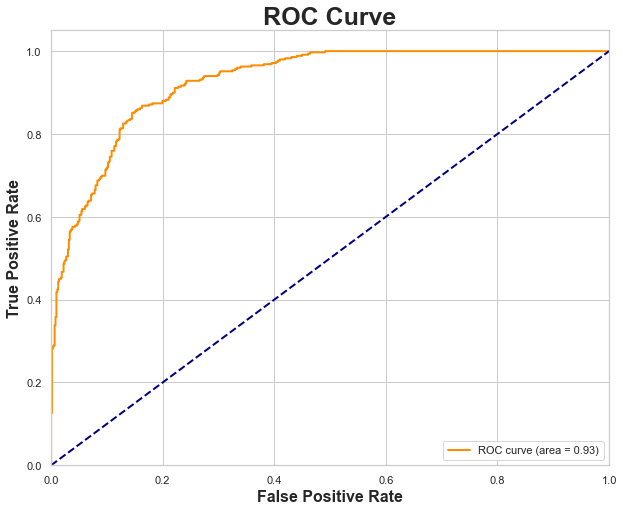

In [95]:
# Calculate fpr, tpr, thresholds
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_xgb, y_pred_xgb)

# Calculate AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16, fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=16, fontweight='bold')
plt.title('ROC Curve',fontsize=25, fontweight='bold')
plt.legend(loc="lower right")
plt.show()

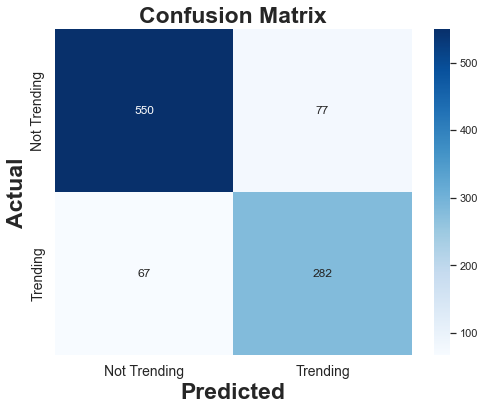

In [96]:
# Compute confusion matrix
cm = confusion_matrix(y_test_xgb, y_pred_class_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Trending', 'Trending'], yticklabels=['Not Trending', 'Trending'])
plt.xlabel('Predicted',fontsize=23, fontweight='bold')
plt.ylabel('Actual',fontsize=23, fontweight='bold')
plt.title('Confusion Matrix',fontsize=23, fontweight='bold')
# Set font properties for x-axis tick labels
plt.xticks(fontsize=14 )  
# Set font properties for y-axis tick labels
plt.yticks(fontsize=14) 
plt.show()

### Inference:
- We have 2 classes in our model namely Not Trending AND Trending.
- From the matrix we can see that 550 elements were correctly classified as Not Trending and 282 were classified as  Trending.
- Other than this 67,77 were wrongly classified.

#  Random Forest vs Tuned Random Forest vs XGBoost

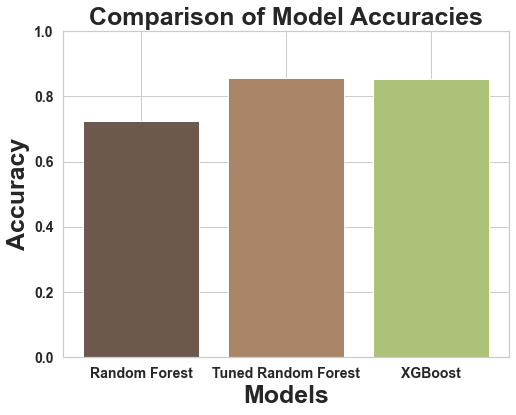

In [97]:
# Now we compare the accuracy of both the model.
import matplotlib.pyplot as plt

# Define model names and their accuracies
model_names = ['Random Forest','Tuned Random Forest', 'XGBoost']
accuracies = [accuracy_random_forest,accuracy_tuned_rf, accuracy_xgboost]  # Provide the accuracies of the models

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['#6c584c','#a98467', '#adc178'])
plt.xlabel('Models',fontsize=25, fontweight='bold')
plt.ylabel('Accuracy',fontsize=25, fontweight='bold')
plt.title('Comparison of Model Accuracies',fontsize=25, fontweight='bold')
# Set font properties for x-axis tick labels
plt.xticks(fontsize=14, fontweight='bold')  
# Set font properties for y-axis tick labels
plt.yticks(fontsize=14, fontweight='bold') 
plt.ylim(0.0, 1.0)
plt.show()


In [98]:
from sklearn.metrics import precision_score
# Calculate precision for Random Forest model
precision_rf = precision_score(y_test, y_pred_rf)

In [99]:
# Calculate precision for XGBoost model
precision_xgb = precision_score(y_test_xgb, y_pred_class_xgb)

### Comparing precision

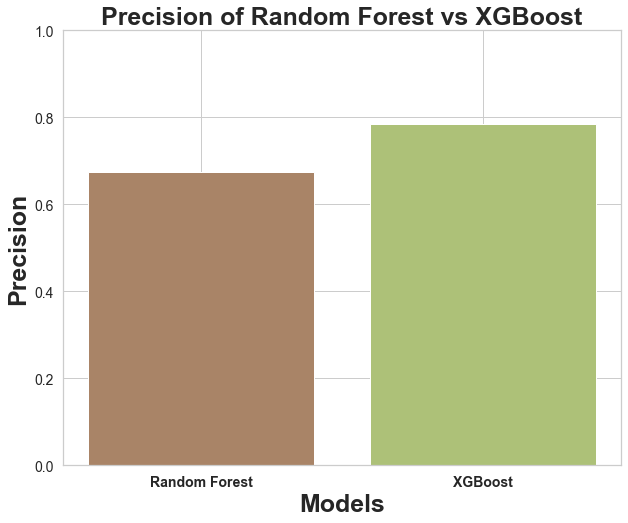

In [100]:
# Plotting
models = ['Random Forest', 'XGBoost']
precisions = [precision_rf, precision_xgb]
plt.bar(models, precisions,color=['#a98467', '#adc178'])
plt.xlabel('Models',fontsize=25, fontweight='bold')
plt.ylabel('Precision',fontsize=25, fontweight='bold')
plt.title('Precision of Random Forest vs XGBoost',fontsize=25, fontweight='bold')
plt.ylim(0, 1)
# Set font properties for x-axis tick labels
plt.xticks(fontsize=14, fontweight='bold')  
# Set font properties for y-axis tick labels
plt.yticks(fontsize=14)
plt.show()

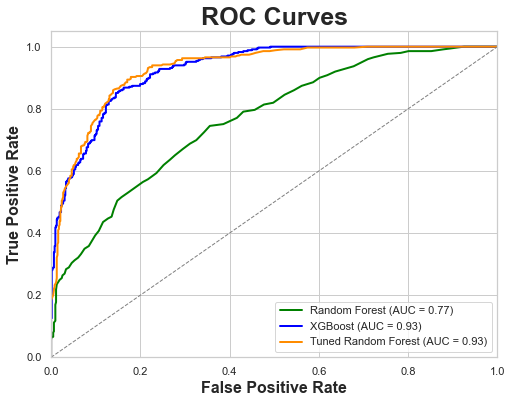

In [101]:
# Plot ROC curves for Random Forest, XGBoost, and previously plotted Random Forest
plt.figure(figsize=(8, 6))

# Plot ROC curve for Random Forest (previously plotted)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Plot ROC curve for XGBoost
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

# Plot ROC curve for newly plotted Random Forest
plt.plot(fpr_tuned_rf, tpr_tuned_rf, color='darkorange', lw=2, label='Tuned Random Forest (AUC = %0.2f)' % roc_auc_tuned_rf)

# Plot baseline (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=16, fontweight='bold')
plt.title('ROC Curves', fontsize=25, fontweight='bold')
plt.legend(loc='lower right')
plt.show()


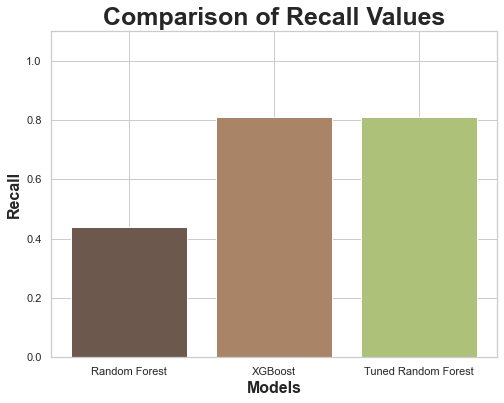

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Define recall values for each model
recall_rf = 0.44  # Recall value for Random Forest (previously plotted)
recall_xgb = 0.81  # Recall value for XGBoost
recall_new_rf = 0.81  # Recall value for newly plotted Random Forest

# Create bar plot
models = ['Random Forest', 'XGBoost', 'Tuned Random Forest']
recall_values = [recall_rf, recall_xgb, recall_new_rf]

plt.figure(figsize=(8, 6))
plt.bar(models, recall_values, color=['#6c584c','#a98467', '#adc178'])
plt.xlabel('Models', fontsize=16, fontweight='bold')
plt.ylabel('Recall', fontsize=16, fontweight='bold')
plt.title('Comparison of Recall Values', fontsize=25, fontweight='bold')
plt.ylim(0, 1.1)
plt.show()


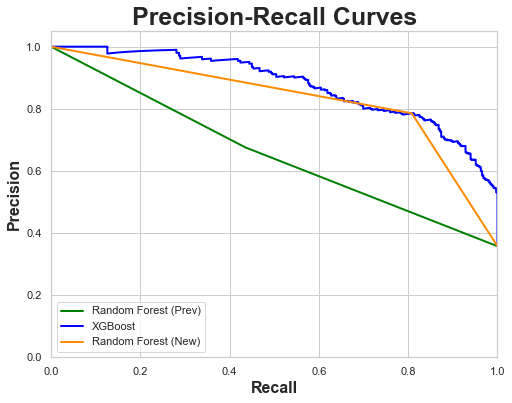

In [103]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall values for each model
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test_xgb, y_pred_xgb)
precision_new_rf, recall_new_rf, _ = precision_recall_curve(y_test_xgb, y_pred_class_xgb)

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest (Prev)')
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label='XGBoost')
plt.plot(recall_new_rf, precision_new_rf, color='darkorange', lw=2, label='Random Forest (New)')

plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curves', fontsize=25, fontweight='bold')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
